In [1]:
import matplotlib.pyplot as plt
from astropy.time import Time
from astroplan.plots import plot_airmass
from astroplan import FixedTarget, Observer
import pandas as pd
import numpy as np
import astropy.units as u
from astropy.coordinates import SkyCoord
import pytz
from astroplan import Observer, FixedTarget

In [24]:
df = pd.read_table("globular_cluster_list.txt",sep='|', index_col=False)
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [25]:
from astroplan import ObservingBlock
from astroplan.constraints import TimeConstraint
from astropy import units as u
from astroplan.scheduling import Transitioner

mcdonald_observatory = Observer(longitude = -104.022 * u.deg,
                    latitude = 30.6714 * u.deg,
                    elevation = 2077 * u.m,
                    timezone = 'US/Central',
                    name = "McDonald Observatory"
                    )

In [26]:
reference_time = Time("2023-05-01")

In [27]:
astro_set = mcdonald_observatory.twilight_evening_astronomical(reference_time, which='nearest')
astro_rise = mcdonald_observatory.twilight_morning_astronomical(reference_time, which='next')
midnight_mro = mcdonald_observatory.midnight(reference_time, which='next')

In [28]:
midnight_mro

<Time object: scale='utc' format='jd' value=2460065.7868648614>

In [29]:
df['whether_up'] = False

In [30]:
for index, row in df.iterrows():
    coords = SkyCoord(row['ra'] + " " + row['dec'], frame="icrs", unit=(u.hourangle, u.deg))
    target = FixedTarget(name= row['name'], coord=coords)
    df.at[index,'whether_up'] = mcdonald_observatory.target_is_up(midnight_mro, target)

In [31]:
df = df[df['whether_up'] == True]
df = df.reset_index()

In [32]:
df

,index,name,alt_name,ra,dec,vmag,bv_color,helio_distance,metallicity,whether_up
0,0,Pal 1,,03 33 20.04,+79 34 51.8,13.18,0.96,11.1,-0.65,True
1,1,NGC 6229,,16 46 58.79,+47 31 39.9,9.39,0.70,30.5,-1.47,True
2,2,NGC 6341,M 92,17 17 07.39,+43 08 09.4,6.44,0.63,8.3,-2.31,True
3,3,NGC 2419,,07 38 08.47,+38 52 56.8,10.41,0.66,82.6,-2.15,True
4,4,NGC 6205,M 13,16 41 41.24,+36 27 35.5,5.78,0.68,7.1,-1.53,True
5,6,NGC 6779,M 56,19 16 35.57,+30 11 00.5,8.27,0.86,9.4,-1.98,True
6,7,Pal 4,,11 29 16.80,+28 58 24.9,14.20,,108.7,-1.41,True
7,8,NGC 5466,,14 05 27.29,+28 32 04.0,9.04,0.67,16.0,-1.98,True
8,9,NGC 5272,M 3,13 42 11.62,+28 22 38.2,6.19,0.69,10.2,-1.50,True
9,10,Ko 2,,07 58 17.00,+26 15 18.0,17.60,,34.7,,True


In [11]:
from astroplan.plots import plot_sky
import matplotlib.pyplot as plt
from astroplan import time_grid_from_range

start_time = astro_set
end_time = astro_rise

observing_range = [astro_set, astro_rise]
time_grid = time_grid_from_range(observing_range)

In [68]:
df.head()

,name,alt_name,ra,dec,vmag,bv_color,helio_distance,metallicity
0,Pal 1,,03 33 20.04,+79 34 51.8,13.18,0.96,11.1,-0.65
1,NGC 6229,,16 46 58.79,+47 31 39.9,9.39,0.70,30.5,-1.47
2,NGC 6341,M 92,17 17 07.39,+43 08 09.4,6.44,0.63,8.3,-2.31
3,NGC 2419,,07 38 08.47,+38 52 56.8,10.41,0.66,82.6,-2.15
4,NGC 6205,M 13,16 41 41.24,+36 27 35.5,5.78,0.68,7.1,-1.53


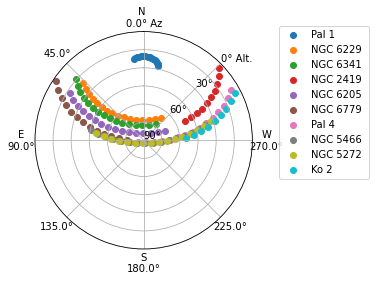

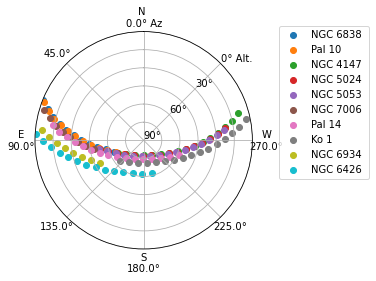

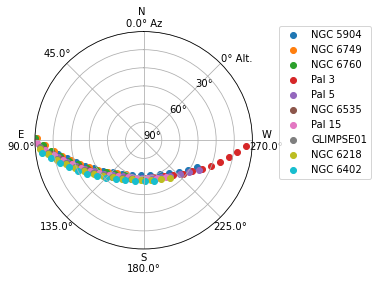

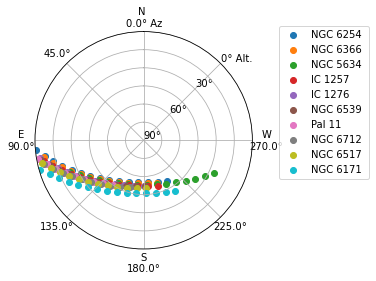

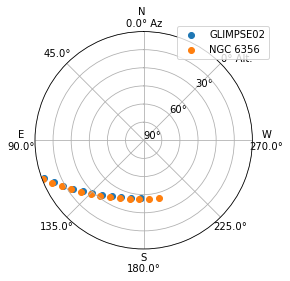

In [23]:
for a in range(0,5):
    fig = plt.figure()
    for index, row in df[a * 10 :(a + 1) * 10].iterrows():
        coords = SkyCoord(row['ra'] + " " + row['dec'], frame="icrs", unit=(u.hourangle, u.deg))
        target = FixedTarget(name= row['name'], coord=coords)
        ax = plot_sky(target, mcdonald_observatory, time_grid ) 
        ax.plot(label= row['name'])

    ax.legend(bbox_to_anchor=(1.1, 1.05))
    plt.show()

AttributeError: Longitude instance has no attribute 'radian'

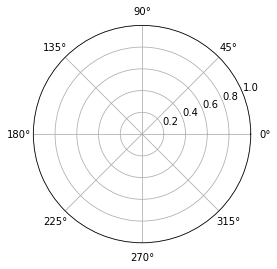

In [71]:
observe_time = midnight_mro + np.linspace(-10, 10, 20)*u.hour
this_room = Observer(longitude = -104.022 * u.deg,
                    latitude = 30.6714 * u.deg,
                    elevation = 2077 * u.m,
                    timezone = 'US/Pacific',
                    name = "Computer Lab"
                    )

fig = plt.figure()
for index, row in df[0:10].iterrows():
    coords = SkyCoord(row['ra'] + " " + row['dec'], frame="icrs", unit=(u.hourangle, u.deg))
    target = FixedTarget(name= row['name'], coord=coords)
    ax = plot_sky(target, this_room, observe_time)
    ax.plot(label= row['name'])
    
ax.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()
plt.savefig('1.png')

str

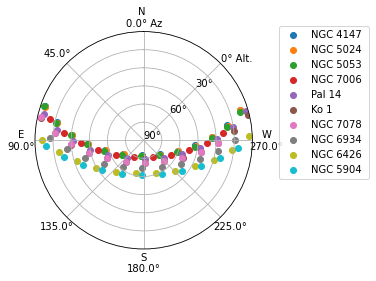

<Figure size 432x288 with 0 Axes>

In [83]:
for index, row in df[10:20].iterrows():
    coords = SkyCoord(row['ra'] + " " + row['dec'], frame="icrs", unit=(u.hourangle, u.deg))
    target = FixedTarget(name= row['name'], coord=coords)
    ax = plot_sky(target, this_room, observe_time)
    ax.plot(label= row['name'])
    
ax.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()
plt.savefig('2.png')

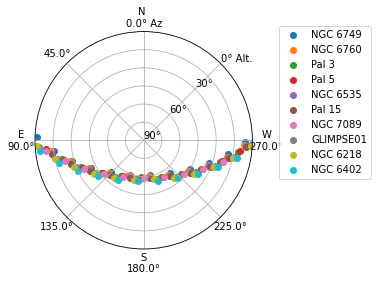

<Figure size 432x288 with 0 Axes>

In [85]:
for index, row in df[20:30].iterrows():
    coords = SkyCoord(row['ra'] + " " + row['dec'], frame="icrs", unit=(u.hourangle, u.deg))
    target = FixedTarget(name= row['name'], coord=coords)
    ax = plot_sky(target, this_room, observe_time)
    ax.plot(label= row['name'])
    
ax.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()
plt.savefig('3.png')

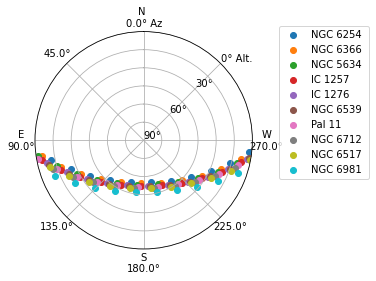

<Figure size 432x288 with 0 Axes>

In [86]:
for index, row in df[30:40].iterrows():
    coords = SkyCoord(row['ra'] + " " + row['dec'], frame="icrs", unit=(u.hourangle, u.deg))
    target = FixedTarget(name= row['name'], coord=coords)
    ax = plot_sky(target, this_room, observe_time)
    ax.plot(label= row['name'])
    
ax.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()
plt.savefig('4.png')

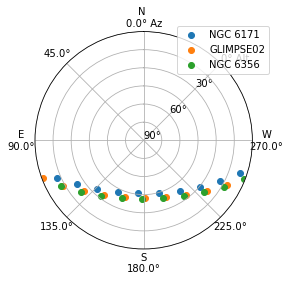

<Figure size 432x288 with 0 Axes>

In [87]:
for index, row in df[40:48].iterrows():
    coords = SkyCoord(row['ra'] + " " + row['dec'], frame="icrs", unit=(u.hourangle, u.deg))
    target = FixedTarget(name= row['name'], coord=coords)
    ax = plot_sky(target, this_room, observe_time)
    ax.plot(label= row['name'])
    
ax.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()
plt.savefig('5.png')

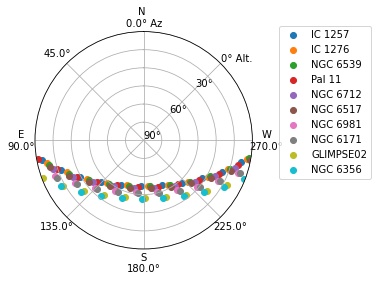

In [72]:
fig = plt.figure()

for index, row in df2.iterrows():
    coords = SkyCoord(row['ra'] + " " + row['dec'], frame="icrs", unit=(u.hourangle, u.deg))
    target = FixedTarget(name= row['name'], coord=coords)
    ax = plot_sky(target, this_room, observe_time)
    ax.plot(label= row['name'])
    
ax.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()